### Regression Example

In [222]:
from sklearn.linear_model import LogisticRegression
from sklearn import datasets, metrics

iris = datasets.load_iris()
classifier = LogisticRegression(max_iter=1000)

classifier.fit(iris.data, iris.target)
score = metrics.accuracy_score(iris.target, classifier.predict(iris.data))
print(f"Accuracy: {score}")

Accuracy: 0.9733333333333334


Variables (150, 4)
Iris type (150,)


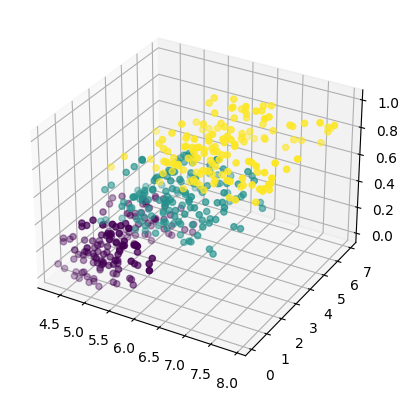

In [223]:
from matplotlib import pyplot as plt
import numpy as np

print(f"Variables {iris.data.shape}")
print(f"Iris type {iris.target.shape}")

a1 = plt.axes(projection ='3d')

z = np.linspace(0, 1, 150)
a1.scatter(iris.data[:, 0], iris.data[:, 1], z, c=iris.target)
a1.scatter(iris.data[:, 0], iris.data[:, 2], z, c=iris.target)
a1.scatter(iris.data[:, 0], iris.data[:, 3], z, c=iris.target)

Above I plot all the data in a 3d plot so we can visualize what all the variables look like together, give each distinct iris type a color so that we can tell the difference between what data points relate to which flower type. I hold the x-axis constant at `n=0` and vary the y-axis as `y = [1 2 3]` dimension of the data, by holding one axis constant and varying the other we can visualize the information across all dimensions. I set the z-axis to an evenly spaced sequence from 0 to 1 in order to give a constant z-axis to create the 3D plot and help visualize the data.

Text(0.5, 0.92, 'Sepal Length vs Petal Width')

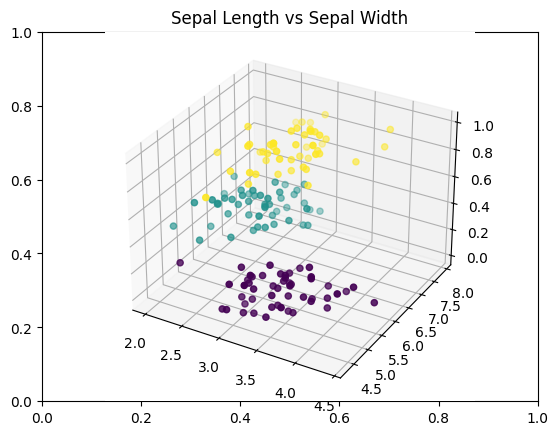

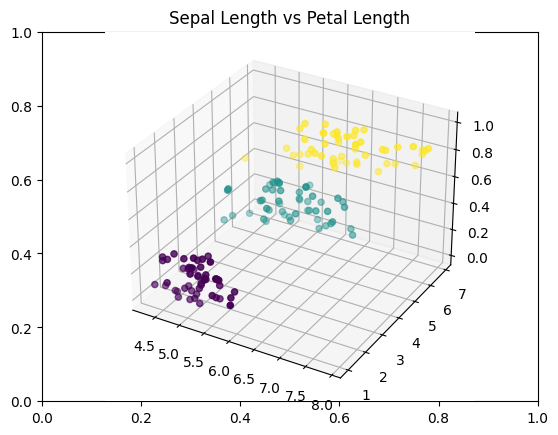

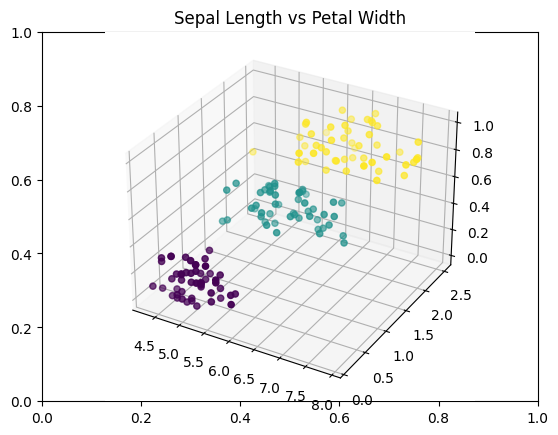

In [224]:
z = np.linspace(0, 1, 150)

fig1, ax1 = plt.subplots()
ax1 = plt.axes(projection ='3d')
ax1.scatter(iris.data[:, 1], iris.data[:, 0], z, c=iris.target)
ax1.set_title("Sepal Length vs Sepal Width")

fig2, ax2 = plt.subplots()
ax2 = plt.axes(projection ='3d')
ax2.scatter(iris.data[:, 0], iris.data[:, 2], z, c=iris.target)
ax2.set_title('Sepal Length vs Petal Length')

fig3, ax3 = plt.subplots()
ax3 = plt.axes(projection ='3d')
ax3.scatter(iris.data[:, 0], iris.data[:, 3], z, c=iris.target)
ax3.set_title('Sepal Length vs Petal Width')


In the above 3 plots we plot all the dimensions separately in 3D the same way we did in the previous plot, however this allows us to see the data in terms of each individual dimension.  

### Notes
* Plot 2 and 3 seem easily distinguishable
* Plot 1 is messy and has each color more mixed up
* The original plot seems somewhat messy however its due to the data in plot one or Septal length vs width.
* One idea would be just to ignore the data in dim 1 since that is the data that is messy

In [225]:
# Remove one feature from the iris dataset and see how it affects the accuracy of the classifier
# We remove the second feature (index 1) from the iris dataset
classifier = LogisticRegression(max_iter=1000)

data = np.array(iris.data)
print(data.shape)
print(data[0])

data = np.delete(data, 1, 1)

print(data.shape)
print(data[0])

classifier.fit(data, iris.target)
score = metrics.accuracy_score(iris.target, classifier.predict(data))
print("Accuracy: %f" % score)

# We add the new feature that is a linearly spaced array from 0 to 1 that we used for the visualization plots
# Lets see what happens
data = np.array(iris.data)
lin = np.linspace(0, 1, 150)        # Create a linearly spaced array from 0 to 1 with 150 elements
lin = np.array([lin]).T             # We have to transpose to get to the correct shape
data = np.append(data, lin, 1)
print(data[0])
print(data.shape)

classifier.fit(data, iris.target)
score = metrics.accuracy_score(iris.target, classifier.predict(data))
print("Accuracy: %f" % score)

(150, 4)
[5.1 3.5 1.4 0.2]
(150, 3)
[5.1 1.4 0.2]
Accuracy: 0.966667
[5.1 3.5 1.4 0.2 0. ]
(150, 5)
Accuracy: 0.986667


### Results

In the above experiment I utilized the same Regression classifier but removed the index 1 feature that I found to be messier in the visualization, but to my surprise the classifier accuracy was worse, it looks like that feature holds valuable information.

In the second experiment we used the original data set but added a linear spaced array to the dataset as we did in our visualizations and the accuracy improved!